In [42]:
#required library installed 
!pip install pandas nltk vaderSentiment requests matplotlib

In [43]:
import requests

def fetch_news(api_key, query, page_size=5):
    url = f"https://newsapi.org/v2/everything?q={query}&pageSize={page_size}&apiKey={api_key}"
    response = requests.get(url)
    return response.json()['articles']

api_key = '6764bed8288d484c9f78c4bebd6f0631'
query = 'Sport' 
news_articles = fetch_news(api_key, query)
print(news_articles)


[{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Marah Eakin', 'title': 'Breaking Gold Medalist Phil Wizard Says Raygun Doesn’t Deserve the Meme Machine’s Wrath', 'description': 'The b-boy weighed in on the past, present, and future of his sport during WIRED’s The Big Interview event.', 'url': 'https://www.wired.com/story/big-interview-phil-wizard-2024/', 'urlToImage': 'https://media.wired.com/photos/674f62abc06a9bf54a2809ec/191:100/w_1280,c_limit/TD_PhilWizard_2024_12_03_010.jpg', 'publishedAt': '2024-12-03T21:37:13Z', 'content': 'It needs to be more transparent, Wizard said. This person won. Why did they win, by what margin, and with what technical details? We have to put in a lot more work to make it more easily understandab… [+1054 chars]'}, {'source': {'id': None, 'name': 'BBC News'}, 'author': 'BBC Sport', 'title': 'Skiing great Vonn impresses on World Cup return', 'description': 'Lindsey Vonn marks her World Cup return after more than five years away from the sport with 

In [44]:
import re

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text


In [45]:
def analyze_articles(news_articles):
    sentiments = []
    for article in news_articles:
        # Replace None with an empty string
        title = article['title'] if article['title'] is not None else ""
        description = article['description'] if article['description'] is not None else ""
        
        text = title + " " + description
        cleaned_text = preprocess_text(text)
        sentiment_score = analyze_sentiment(cleaned_text)
        sentiments.append((title, sentiment_score))
    return sentiments

# Analyze the articles
sentiments = analyze_articles(news_articles)
print(sentiments)


[('Breaking Gold Medalist Phil Wizard Says Raygun Doesn’t Deserve the Meme Machine’s Wrath', 0.0), ('Skiing great Vonn impresses on World Cup return', 0.9371), ("'Man City's golden transfer touch under intense scrutiny'", 0.4588), ("Are there 'different approaches' to tennis doping cases?", 0.1531), ('[Removed]', 0.0)]


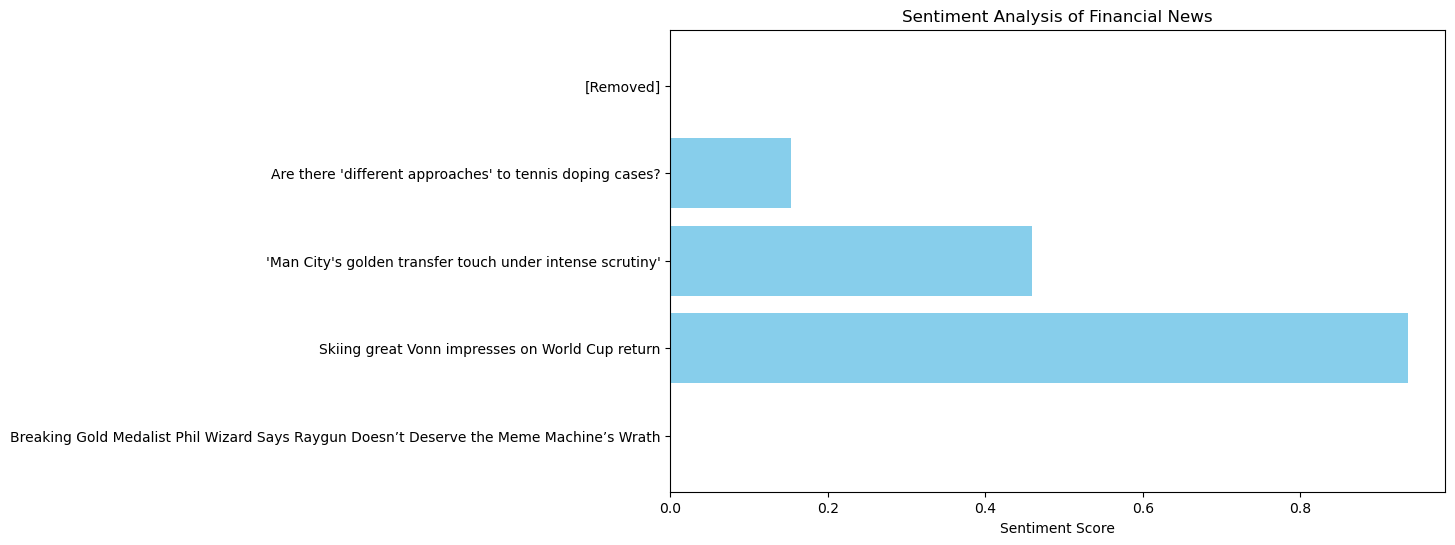

In [46]:
import matplotlib.pyplot as plt

def plot_sentiment_analysis(sentiments):
    titles = [x[0] for x in sentiments]
    sentiment_scores = [x[1] for x in sentiments]
    
    plt.figure(figsize=(10, 6))
    plt.barh(titles, sentiment_scores, color='skyblue')
    plt.xlabel('Sentiment Score')
    plt.title('Sentiment Analysis of Financial News')
    plt.show()

plot_sentiment_analysis(sentiments)


In [47]:
import pandas as pd

def save_to_csv(sentiments, filename='sentiment_results.csv'):
    df = pd.DataFrame(sentiments, columns=['Title', 'Sentiment Score'])
    df.to_csv(filename, index=False)

save_to_csv(sentiments)
